In [2]:
import pandas as pd
import numpy as np
import sympy as sym
from scipy import constants
import matplotlib.pyplot as plt
from scipy import optimize

In [109]:
path = "C:/Users/Darck/Modern_Phy_Lab/6 Doble Rendija/Double Slit.csv"

data = pd.read_csv(path, sep = ";")
data

,Longitud,Voltaje,Unnamed: 2
0,-4700,0.020,NaN
1,-4680,0.021,NaN
2,-4660,0.021,NaN
3,-4640,0.022,NaN
4,-4620,0.022,NaN
...,...,...,...
397,3240,0.303,NaN
398,3260,0.309,NaN
399,3280,0.315,NaN
400,3300,0.321,NaN


In [161]:
end = 402 - 60 
lenght = data["Longitud"].to_numpy()*1e-3 # Está en mm.
lenght[235] = 0.00001
lenght = lenght[130:402-70]
voltage = data["Voltaje"].to_numpy()
voltage = voltage[130:402-70]
len(voltage), len(lenght)

(202, 202)

In [156]:
# Para poder medir hacer predicciones se ocupa generar una relación V [mV] vs θ:

theta = np.arctan(lenght/470)

array([-2.10e+00, -2.08e+00, -2.06e+00, -2.04e+00, -2.02e+00, -2.00e+00,
       -1.98e+00, -1.96e+00, -1.94e+00, -1.92e+00, -1.90e+00, -1.88e+00,
       -1.86e+00, -1.84e+00, -1.82e+00, -1.80e+00, -1.78e+00, -1.76e+00,
       -1.74e+00, -1.72e+00, -1.70e+00, -1.68e+00, -1.66e+00, -1.64e+00,
       -1.62e+00, -1.60e+00, -1.58e+00, -1.56e+00, -1.54e+00, -1.52e+00,
       -1.50e+00, -1.48e+00, -1.46e+00, -1.44e+00, -1.42e+00, -1.40e+00,
       -1.38e+00, -1.36e+00, -1.34e+00, -1.32e+00, -1.30e+00, -1.28e+00,
       -1.26e+00, -1.24e+00, -1.22e+00, -1.20e+00, -1.18e+00, -1.16e+00,
       -1.14e+00, -1.12e+00, -1.10e+00, -1.08e+00, -1.06e+00, -1.04e+00,
       -1.02e+00, -1.00e+00, -9.80e-01, -9.60e-01, -9.40e-01, -9.20e-01,
       -9.00e-01, -8.80e-01, -8.60e-01, -8.40e-01, -8.20e-01, -8.00e-01,
       -7.80e-01, -7.60e-01, -7.40e-01, -7.20e-01, -7.00e-01, -6.80e-01,
       -6.60e-01, -6.40e-01, -6.20e-01, -6.00e-01, -5.80e-01, -5.60e-01,
       -5.40e-01, -5.20e-01, -5.00e-01, -4.80e-01, 

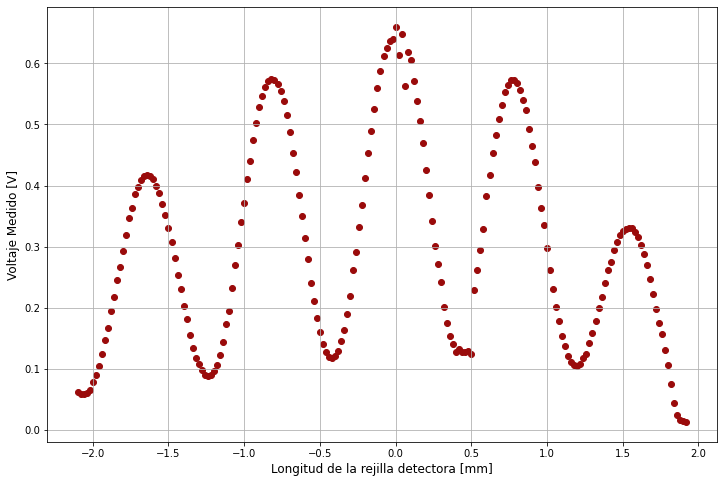

In [170]:
plt.figure(figsize=(12,8))
plt.scatter(lenght, voltage,  color = "#9A0B0B")
plt.xlabel(r"Longitud de la rejilla detectora [mm]", fontsize = 12)
plt.ylabel(r"Voltaje Medido [V]", fontsize = 12)
plt.grid()

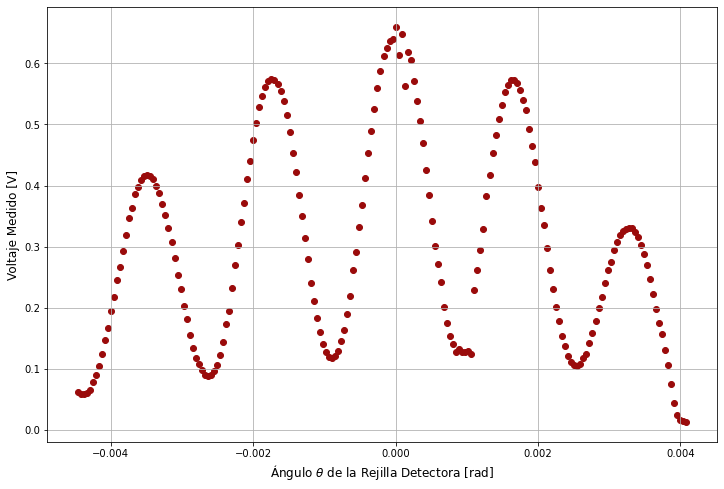

In [173]:
plt.figure(figsize=(12,8))
plt.scatter(theta, voltage,  color = "#9A0B0B")
plt.xlabel(r"Ángulo $\theta$ de la Rejilla Detectora [rad]", fontsize = 12)
plt.ylabel(r"Voltaje Medido [V]", fontsize = 12)
plt.grid()
plt.savefig("VoltajeÁngulo.pdf")
theta[105] = 0.000001

In [174]:
a = 0.2
d = 0.457
lambda_ = 6.7e-6
l = 470

def Awaited(theta, I_0):
    alpha = (np.pi*a)/lambda_ * np.sin(theta)
    beta = (np.pi*d)/lambda_ * np.sin(theta)
    return (I_0**2) * (np.cos(beta)**2) * ((np.sin(alpha)/alpha)**2)

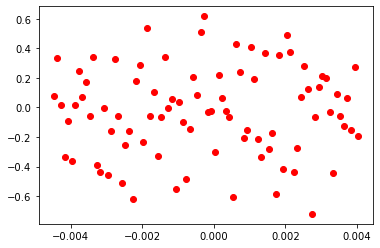

In [175]:
a = theta[0]
b = theta[-1]
x = np.arange(a, b, 1e-4)
np.random.seed()
y_noise = 0.3 * np.random.normal(size = x.size)
y = Awaited(x, 0.6)
y = y + y_noise
plt.plot(x, y, "or")

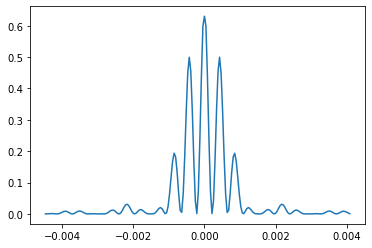

In [181]:
increment = 1e-6
popt, pcov = optimize.curve_fit(Awaited, theta, voltage)
ymodel = Awaited(theta, np.sqrt(0.66))
plt.plot(theta, ymodel)

In [177]:
popt, pcov = optimize.curve_fit(Awaited, theta, voltage)
popt, pcov

(array([0.9065718]), array([[0.0031717]]))

In [178]:
new = Awaited(theta, np.sqrt(0.66))

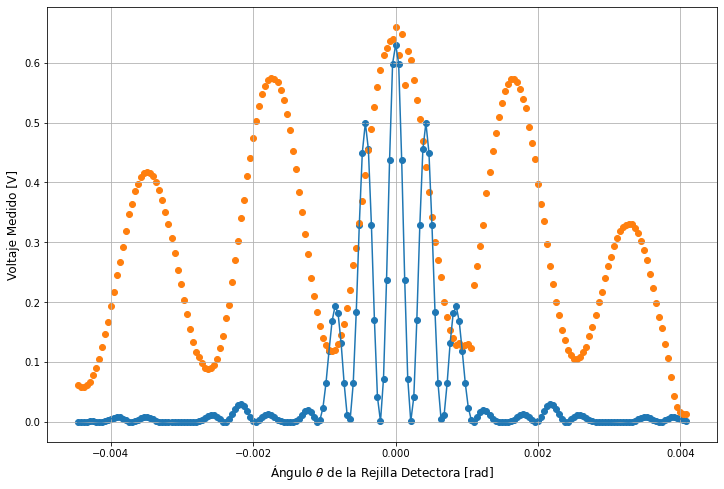

In [182]:
plt.figure(figsize=(12,8))
plt.scatter(theta, new)
plt.scatter(theta, voltage)
plt.plot(theta, ymodel)
plt.xlabel(r"Ángulo $\theta$ de la Rejilla Detectora [rad]", fontsize = 12)
plt.ylabel(r"Voltaje Medido [V]", fontsize = 12)
plt.grid()
plt.savefig("Intento.pdf")